The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

### 1. What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.


### 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.


### 3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.


### 4. Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.


### 5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list

In [435]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [436]:
nobel = pd.read_csv('nobel.csv')
print(nobel.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [437]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

### Question 1

Male


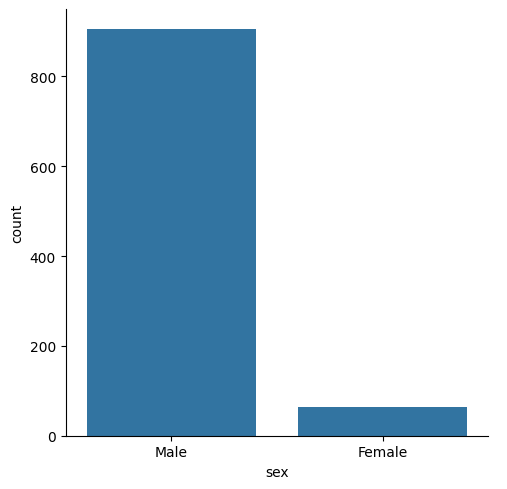

In [438]:
sns.catplot(kind = 'count', data = nobel, x = 'sex')

top_gender = nobel['sex'].value_counts().index[0]

print(top_gender)

### Question 2

In [439]:
print(nobel)

     year    category                                              prize  \
0    1901   Chemistry                  The Nobel Prize in Chemistry 1901   
1    1901  Literature                 The Nobel Prize in Literature 1901   
2    1901    Medicine     The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                         The Nobel Peace Prize 1901   
4    1901       Peace                         The Nobel Peace Prize 1901   
..    ...         ...                                                ...   
995  2023   Chemistry                  The Nobel Prize in Chemistry 2023   
996  2023   Chemistry                  The Nobel Prize in Chemistry 2023   
997  2023  Literature                 The Nobel Prize in Literature 2023   
998  2023       Peace                         The Nobel Peace Prize 2023   
999  2023   Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
0    "in recognit

In [440]:
nobel["decade"] = ((nobel["year"] // 10) * 10)

nobel['is_usa'] = nobel['birth_country'] == 'United States of America'

num_usa = nobel[nobel['birth_country'] == 'United States of America'].groupby('decade').sum()


print(num_usa)

          year                                           category  \
decade                                                              
1900      1906                                              Peace   
1910      5745                                PeaceChemistryPeace   
1920      7704                           PhysicsPeacePhysicsPeace   
1930     27079  LiteraturePeacePeaceChemistryMedicineChemistry...   
1940     25295  MedicineMedicineMedicinePeaceChemistryChemistr...   
1950     41041  MedicineMedicinePeaceChemistryChemistryPhysics...   
1960     41259  ChemistryPhysicsChemistryPhysicsLiteratureMedi...   
1970     65167  EconomicsMedicinePeaceMedicineChemistryChemist...   
1980     61517  ChemistryChemistryEconomicsMedicinePhysicsPhys...   
1990     83755  ChemistryEconomicsEconomicsEconomicsMedicineMe...   
2000    104218  ChemistryEconomicsEconomicsMedicinePhysicsChem...   
2010     76543  ChemistryEconomicsEconomicsEconomicsEconomicsM...   
2020     36383  MedicineMedicinePh

In [441]:
max_decade_usa_df = ((num_usa['is_usa'])/(nobel.groupby('decade').size())).sort_values(ascending=False)

print(max_decade_usa_df)

decade
2000    0.422764
1990    0.403846
2020    0.360000
1980    0.319588
1970    0.317308
2010    0.314050
1940    0.302326
1950    0.291667
1960    0.265823
1930    0.250000
1910    0.075000
1920    0.074074
1900    0.017544
dtype: float64


In [442]:
max_decade_usa = max_decade_usa_df.idxmax()

print(max_decade_usa)

2000


### Question 3


In [443]:
print(nobel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [444]:
nobel['is_female'] = nobel['sex'] == 'Female'

num_female = nobel[nobel['is_female']].groupby('decade').sum()

print(num_female)

         year                                           category  \
decade                                                             
1900     5717                             PhysicsPeaceLiterature   
1910     1911                                          Chemistry   
1920     3854                               LiteratureLiterature   
1930     5804                           PeaceChemistryLiterature   
1940     5838                            LiteraturePeaceMedicine   
1960     5893                         PhysicsChemistryLiterature   
1970     7908                            PeacePeaceMedicinePeace   
1980     7939                      PeaceMedicineMedicineMedicine   
1990    13955  LiteraturePeacePeaceLiteratureMedicineLiteratu...   
2000    22075  PeaceLiteratureMedicinePeaceLiteratureMedicine...   
2010    26195  PeacePeacePeaceLiteratureMedicinePeaceLiteratu...   
2020    22237  PhysicsChemistryChemistryLiteraturePeaceChemis...   

                                               